<a href="https://colab.research.google.com/github/phuocthok18/AI_HKI_2022_2023/blob/main/BenhCayCaChua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import datasets, Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array, to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_generator = ImageDataGenerator(rescale = 1./255, validation_split = 0.1, width_shift_range = 0.2,
                                    height_shift_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
trainset = '/content/drive/MyDrive/CaChua'
train_dataset = data_generator.flow_from_directory(trainset, target_size = (256,256), batch_size = 128,
                                                   class_mode = 'categorical',subset = "training", shuffle = True)
validation_set = data_generator.flow_from_directory(trainset, target_size = (256,256), batch_size = 128,
                                                   class_mode = 'categorical',subset = "validation", shuffle = True)
validation_set.class_indices

Found 7595 images belonging to 3 classes.
Found 843 images belonging to 3 classes.


{'Tomato_bac_la_som': 0, 'Tomato_heo_vang': 1, 'Tomato_khoe': 2}

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(256,256,3)))
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(3,3))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(3,3))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform', name='layer1'))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', name='layer2'))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform', name='layer3'))
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform', name='layer4'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax', name='layer5'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = model.fit(train_dataset, batch_size = 128, verbose = 1, epochs = 10, validation_data = validation_set)
model.save('Benhcaycachua.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 85, 85, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                    

In [ ]:
metric = model.evaluate(validation_set, verbose=2)
print('sai so:', metric[0])
print('do chinh xac test:', metric[1])

7/7 - 58s - loss: 0.0658 - accuracy: 0.9727 - 58s/epoch - 8s/step
sai so: 0.0657825618982315
do chinh xac test: 0.9727165102958679


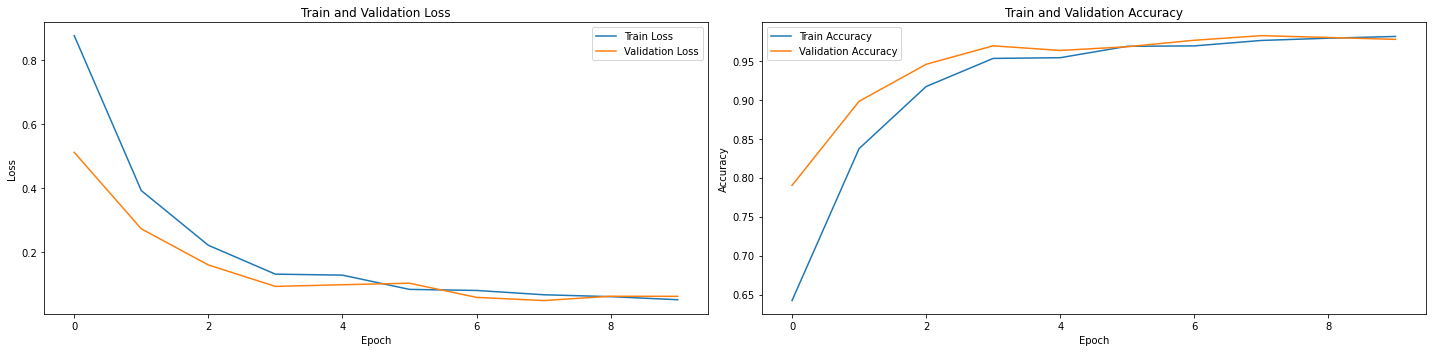

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.legend()
plt.tight_layout()

In [7]:
from IPython.display import display, Javascript, Image
# JavaScript to properly create our live video stream using our webcam as input

def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }
      // jpeg
      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'Bấm vào video để dừng</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [8]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [9]:
%cd /content
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import numpy as np
import PIL
import io
import cv2
from keras.models import  load_model

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Realtime...'
# initialze bounding box to empty
bbox = ''
count = 0 

# Load model nhận dạng cà chua
model_file_path = "/content/drive/MyDrive/CaChua/Benhcaycachua.h5"
vggmodel = load_model(model_file_path)

classes = ['Bac_la_som','Heo_vang','La_khoe']

while True:
    # Đọc ảnh trả về từ JS
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])

    # Resize để đưa vào model
    frame_p = cv2.resize(frame, dsize=(256,256))
    tensor = np.expand_dims(frame_p, axis=0)

    # Feed vào mạng
    pred = vggmodel.predict(tensor)
    class_id = np.argmax(pred)
    class_name = classes[class_id]

    # Vẽ lên một ảnh để tẹo nữa overlay

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)
   
    bbox_array = cv2.putText(bbox_array, "{}".format(class_name),
                        (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        (0, 255,0), 2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay


/content


<IPython.core.display.Javascript object>

1/1 [==============================] - 7s 7s/step


1/1 [==============================] - 0s 66ms/step
Giá trị: 0
1/1 [==============================] - 0s 73ms/step
Bac_la_som


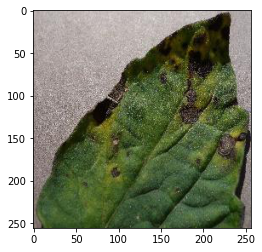

In [ ]:
pic = load_img('/content/drive/MyDrive/CaChua/Tomato_bac_la_som/0012b9d2-2130-4a06-a834-b1f3af34f57e___RS_Erly.B 8389.JPG', target_size=(256,256)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,256,256,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)
classes = ['Bac_la_som','Heo_vang','La_khoe']
print('Giá trị:', np.argmax(model.predict(pic)))
print(classes[np.argmax(model.predict(pic))])

1/1 [==============================] - 0s 75ms/step
Giá trị: 1
1/1 [==============================] - 0s 74ms/step
Heo_vang


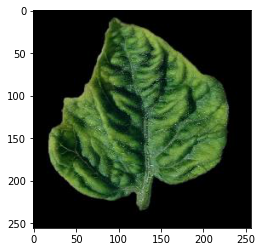

In [ ]:
pic = load_img('/content/drive/MyDrive/CaChua/Tomato_heo_vang/003bce78-28c9-4612-b148-f621e9a23bd4___YLCV_GCREC 5154_final_masked.jpg', target_size=(256,256)) # độ phân giải tùy ae chọn nhé!
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,256,256,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)
classes = ['Bac_la_som','Heo_vang','La_khoe']
print('Giá trị:', np.argmax(model.predict(pic)))
print(classes[np.argmax(model.predict(pic))])

1/1 [==============================] - 0s 119ms/step
Giá trị: 2
1/1 [==============================] - 0s 329ms/step
La_khoe


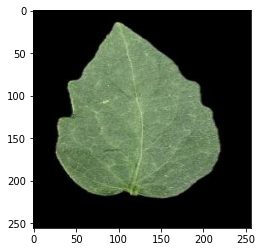

In [ ]:
pic = load_img('/content/drive/MyDrive/CaChua/Tomato_khoe/000146ff-92a4-4db6-90ad-8fce2ae4fddd___GH_HL Leaf 259.1_final_masked.jpg', target_size=(256,256)) # độ phân giải tùy ae chọn nhé!
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,256,256,3) 
pic = pic.astype('float32')
pic = pic/255
model_file_path = "/content/Benhcaycachua.h5"
model = load_model(model_file_path)
np.argmax(model.predict(pic), axis=1)
classes = ['Bac_la_som','Heo_vang','La_khoe']
print('Giá trị:', np.argmax(model.predict(pic)))
print(classes[np.argmax(model.predict(pic))])